In [21]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
# Importing data
data = pd.read_csv('question_3.csv')
data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [7]:
# Checking number of rows and columns 
data.shape

(1143, 13)

In [8]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object

In [9]:
# Checking missing values
print(data.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


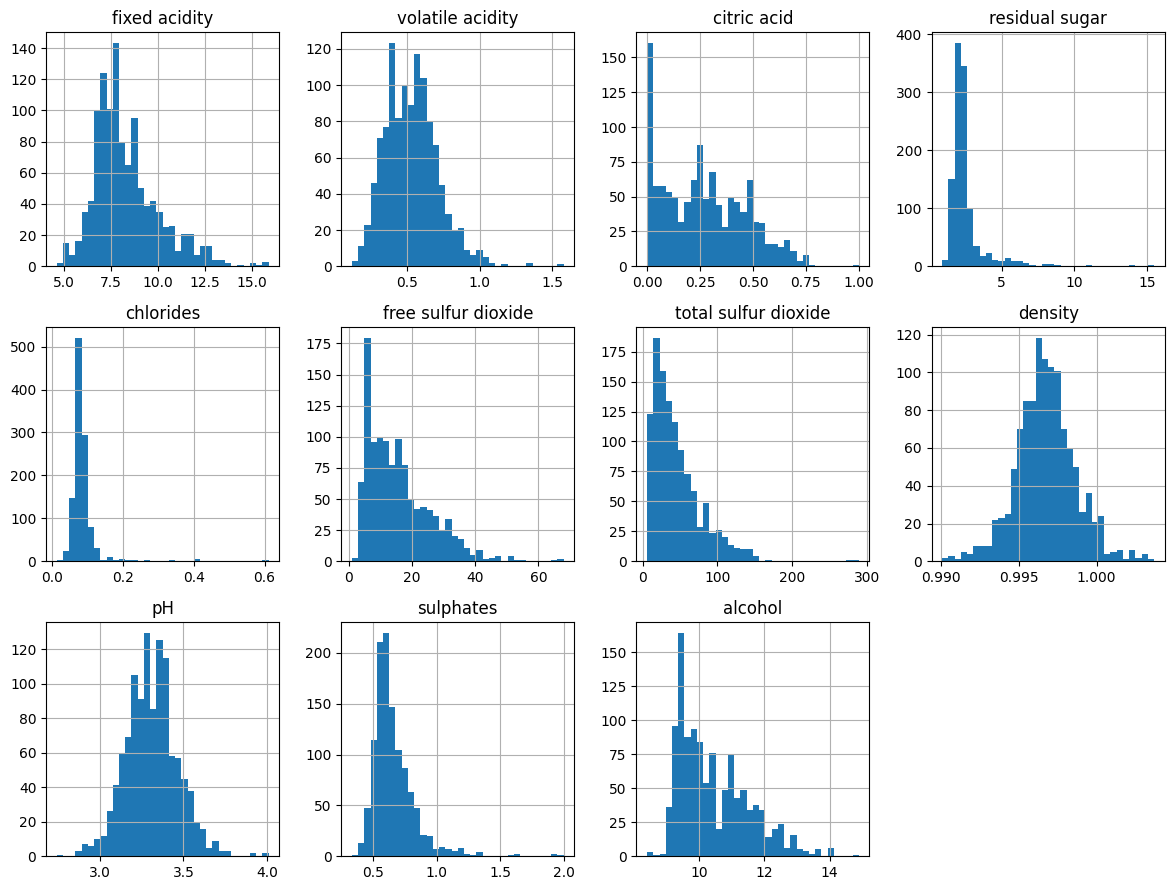

In [64]:
# Plotting histogram of all the features except Quality and Id

selected_columns = data.drop(['quality', 'Id'], axis=1)

# Creating a 3x4 matrix of subplots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 9))

# Flattening the axes array for easier indexing
axes = axes.flatten()

for i, col in enumerate(selected_columns):
    ax = axes[i]
    data[col].hist(ax=ax, bins=34)
    ax.set_title(col)
    
# Adjusting the spacing between subplots
fig.tight_layout()

# Removing empty subplot
fig.delaxes(axes[11])

plt.show()

**Observations**


*   Features such as fixed acidity, volatile acidity, residual sugar, chlorides, and sulphates are slightly right-skewed.
*   Features such as citric acid, free sulfur dioxide, total sulfur dioxide, and alcohol are significantly right-skewed.
*   While, the density and pH features seem to be normally distributed.







In [75]:
print("Column Name".ljust(20),
      "Mean".ljust(10),
      "Median".ljust(10),
      "Mode".ljust(10))
for i in selected_columns:
    mean_value = round(data[i].mean(), 2)
    median_value = round(data[i].median(), 2)
    mode_value = data[i].mode().values[0]
    
    print(
        i.ljust(20),
        str(mean_value).ljust(10),
        str(median_value).ljust(10),
        str(mode_value).ljust(10)
    )

Column Name          Mean       Median     Mode      
fixed acidity        8.31       7.9        7.2       
volatile acidity     0.53       0.52       0.5       
citric acid          0.27       0.25       0.0       
residual sugar       2.53       2.2        2.0       
chlorides            0.09       0.08       0.08      
free sulfur dioxide  15.62      13.0       6.0       
total sulfur dioxide 45.91      37.0       28.0      
density              1.0        1.0        0.9976    
pH                   3.31       3.31       3.3       
sulphates            0.66       0.62       0.6       
alcohol              10.44      10.2       9.5       


**Observations**

From the above results, It can be identified that all the features except density and pH are positively skewed since their mean values are greater than their respective medians, which are also greater than the mode values.

In [63]:
# To calculate Pearson's correlation coefficient for all combinations of variables

selected_columns = data.drop(['Id'], axis=1)
correlation_matrix = selected_columns.corr(method='pearson')
correlation_matrix.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.525988,0.884192,0.321308,0.333286,-0.404323,-0.238288,0.811206,-0.921947,0.394684,-0.268840,0.158780
volatile acidity,-0.525988,1.000000,-0.799307,-0.097022,-0.047934,0.136072,0.195571,-0.124602,0.475806,-0.616508,-0.381518,-0.717861
citric acid,0.884192,-0.799307,1.000000,0.249963,0.367498,-0.301374,-0.177833,0.573326,-0.868635,0.583039,-0.033237,0.370459
residual sugar,0.321308,-0.097022,0.249963,1.000000,0.048743,0.100543,0.194401,0.489245,-0.332852,-0.101413,-0.218398,-0.145262
chlorides,0.333286,-0.047934,0.367498,0.048743,1.000000,-0.120297,0.024047,0.438061,-0.535469,0.517397,-0.521294,-0.281006
free sulfur dioxide,-0.404323,0.136072,-0.301374,0.100543,-0.120297,1.000000,0.883653,-0.225508,0.200415,-0.205673,-0.194132,-0.307035
total sulfur dioxide,-0.238288,0.195571,-0.177833,0.194401,0.024047,0.883653,1.000000,0.004251,0.005523,-0.186504,-0.419149,-0.471725
density,0.811206,-0.124602,0.573326,0.489245,0.438061,-0.225508,0.004251,1.000000,-0.743426,0.191047,-0.721988,-0.323207
pH,-0.921947,0.475806,-0.868635,-0.332852,-0.535469,0.200415,0.005523,-0.743426,1.000000,-0.486300,0.346273,-0.100103
sulphates,0.394684,-0.616508,0.583039,-0.101413,0.517397,-0.205673,-0.186504,0.191047,-0.486300,1.000000,0.048084,0.391480


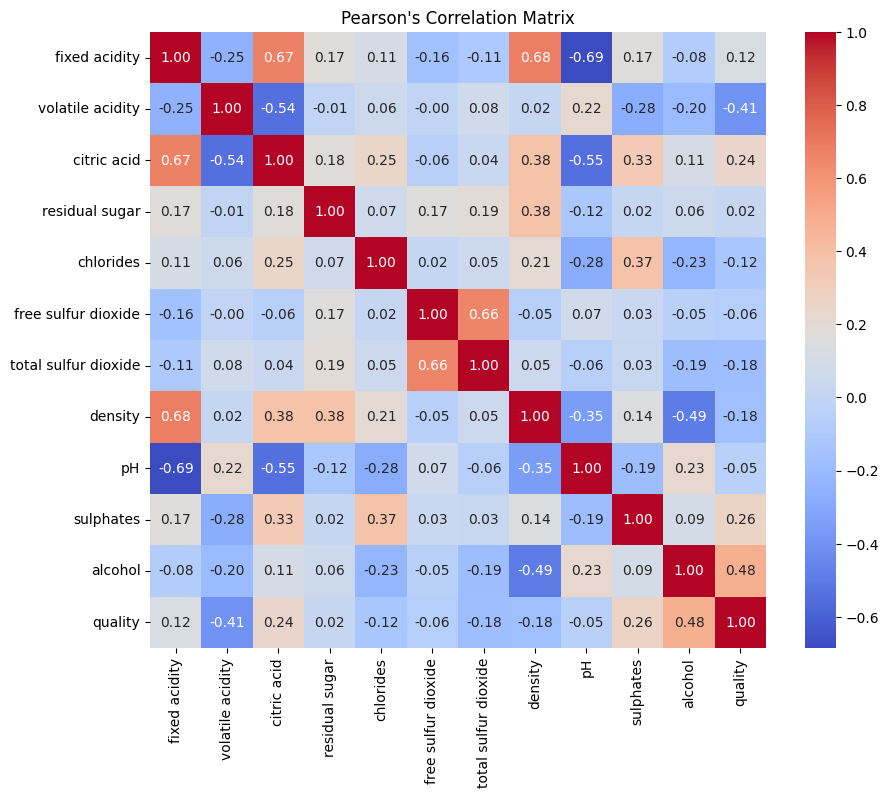

In [48]:
# Creating a heatmap for better visualization of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Pearson's Correlation Matrix")
plt.show()

**The graph above shows the correlation between all the features**

Top 5 features that are positively correlated with each other -

*   fixed acidity, density [0.68]
*   fixed acidity, citric acid [0.67]
*   free sulphur dioxide, total sulphur dioxide [0.66]
*   alcohol, quality [0.48]
*   residual sugar, density or citric acid, density [0.38]

Top 5 features that are negatively correlated with each other -

*   fixed acidity, pH [-0.69]
*   citric acid, pH [-0.55]
*   volatile acidity, citric acid [-0.54]
*   density, alcohol [-0.49]
*   quality, volatile acidity [-0.41]



In [65]:
# To validate the above observations through code

# Extracting the values of upper triangle of the correlation matrix (excluding the diagonal)
upper_triangle = correlation_matrix.where(~np.tril(np.ones(correlation_matrix.shape)).astype(bool))

# Sorting all the pairs in descending order
sorted_pairs = upper_triangle.stack().sort_values(ascending=False)

top_positive_pairs = sorted_pairs[:5]
top_negative_pairs = sorted_pairs[-5:]

print("Top 5 Variable Pairs with Positive Correlation:")
print(top_positive_pairs)
print()
print("Top 5 Variable Pairs with Negative Correlation:")
print(top_negative_pairs)

Top 5 Variable Pairs with Positive Correlation:
fixed acidity        density                 0.681501
                     citric acid             0.673157
free sulfur dioxide  total sulfur dioxide    0.661093
alcohol              quality                 0.484866
residual sugar       density                 0.380147
dtype: float64

Top 5 Variable Pairs with Negative Correlation:
volatile acidity  quality       -0.407394
density           alcohol       -0.494727
volatile acidity  citric acid   -0.544187
citric acid       pH            -0.546339
fixed acidity     pH            -0.685163
dtype: float64


**Plotting Scatter plot to visualize the top 5 variable pairs that shows positive and negative correlation**


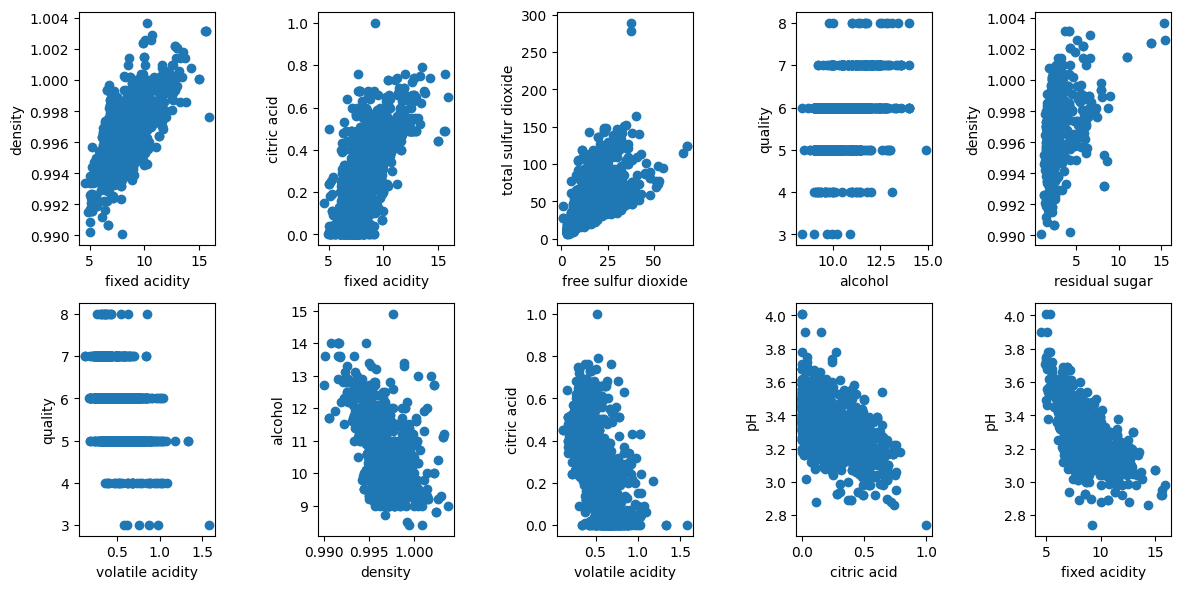

In [62]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12, 6))
axes = axes.flatten()

# Plotting scatter plots for the top positive correlation pairs
for i, pair in enumerate(top_positive_pairs.index):
    x, y = pair
    axes[i].scatter(data[x], data[y])
    axes[i].set_xlabel(x)
    axes[i].set_ylabel(y)

# Plotting scatter plots for the top negative correlation pairs
for i, pair in enumerate(top_negative_pairs.index):
    x, y = pair
    axes[i + 5].scatter(data[x], data[y])
    axes[i + 5].set_xlabel(x)
    axes[i + 5].set_ylabel(y)

# Adjust the layout and spacing of subplots
plt.tight_layout()

# Display the plots
plt.show()

**Observations**

First Row:

*  In Figures 1,2,and 3, the value of X increases with the value of Y, indicating a strong positive correlation between these pairs.
*  In Figures 4,and 5, there is some positive relationship between the pairs as the data points are not completely scattered, indicating some positive correlation in the pairs.

Second Row:

*  In Figure 1, there appears to be some negative correlation between the variables, all the data points are not completely scattered .
*  In Figures 2, 3, 4, and 5, as the value of X increases,the value of Y decreases, indicating a strong negative correlation between these pairs. 


